In [1]:
import pandas as pd 
import numpy as np
import gmaps

In [2]:
input_file = pd.read_csv('../ShahAli.csv')
input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550018 entries, 0 to 4550017
Data columns (total 14 columns):
SL              float64
NAME            object
ACCOUNT_NO      int64
METER_NO        object
ADDRESS         object
ZONE            object
BLOCK           int64
ROUTE           float64
LOAD            int64
TARIFF          object
METER_STATUS    object
MONTH           int64
YEAR            int64
UNIT            float64
dtypes: float64(3), int64(5), object(6)
memory usage: 486.0+ MB


In [3]:
input_file.head()

,SL,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,5702.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,6,2001,176.0
1,5871.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,9,2001,200.0
2,5904.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,10,2001,220.0
3,5916.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,8,2001,214.0
4,6041.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,12,2001,149.0


In [4]:
input_file.tail()

,SL,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
4550013,11034.0,MD.SHAKAWAT HOSSAIN,31518379,14391192,"House/Flat # 1/D, Road # 9/1, Block # A, Secti...",SAFP,100,180.01,2,E,Single,5,2016,4271.0
4550014,11144.0,MD.SHAKAWAT HOSSAIN,31518379,14391192,"House/Flat # 1/D, Road # 9/1, Block # A, Secti...",SAFP,100,180.01,2,E,Single,6,2016,4219.0
4550015,11271.0,MD.SHAKAWAT HOSSAIN,31518379,14391192,"House/Flat # 1/D, Road # 9/1, Block # A, Secti...",SAFP,100,180.01,2,E,Single,7,2016,4363.0
4550016,11461.0,MD.SHAKAWAT HOSSAIN,31518379,14391192,"House/Flat # 1/D, Road # 9/1, Block # A, Secti...",SAFP,100,180.01,2,E,Single,8,2016,4934.0
4550017,11506.0,MD.SHAKAWAT HOSSAIN,31518379,14391192,"House/Flat # 1/D, Road # 9/1, Block # A, Secti...",SAFP,100,180.01,2,E,Single,9,2016,4555.0


In [5]:
pd.isnull(input_file).sum()>0

SL               True
NAME            False
ACCOUNT_NO      False
METER_NO         True
ADDRESS         False
ZONE            False
BLOCK           False
ROUTE           False
LOAD            False
TARIFF          False
METER_STATUS     True
MONTH           False
YEAR            False
UNIT            False
dtype: bool

In [6]:
input_file.isnull().sum()

SL              11792
NAME                0
ACCOUNT_NO          0
METER_NO         1023
ADDRESS             0
ZONE                0
BLOCK               0
ROUTE               0
LOAD                0
TARIFF              0
METER_STATUS       47
MONTH               0
YEAR                0
UNIT                0
dtype: int64

In [7]:
input_file=input_file.dropna()

In [8]:
input_file.isnull().sum()

SL              0
NAME            0
ACCOUNT_NO      0
METER_NO        0
ADDRESS         0
ZONE            0
BLOCK           0
ROUTE           0
LOAD            0
TARIFF          0
METER_STATUS    0
MONTH           0
YEAR            0
UNIT            0
dtype: int64

In [9]:
input_file.to_csv('../ShahAli_cleaned_without_nan_values.csv',index=False)

In [10]:
address = input_file.ADDRESS

In [11]:
address

0                                   BLD-129/10 MIRPUR, DHAKA
1                                   BLD-129/10 MIRPUR, DHAKA
2                                   BLD-129/10 MIRPUR, DHAKA
3                                   BLD-129/10 MIRPUR, DHAKA
4                                   BLD-129/10 MIRPUR, DHAKA
5                                   BLD-129/10 MIRPUR, DHAKA
6                                   BLD-129/10 MIRPUR, DHAKA
7                                   BLD-129/10 MIRPUR, DHAKA
8                                   BLD-129/10 MIRPUR, DHAKA
9                                   BLD-129/10 MIRPUR, DHAKA
10                                  BLD-129/10 MIRPUR, DHAKA
11                                  BLD-129/10 MIRPUR, DHAKA
12                                  BLD-129/10 MIRPUR, DHAKA
13                                  BLD-129/10 MIRPUR, DHAKA
14                                  BLD-129/10 MIRPUR, DHAKA
15                                  BLD-129/10 MIRPUR, DHAKA
16                      

In [12]:
pd.DataFrame(input_file.ADDRESS.unique()).to_csv("../address_shah_ali.csv")

In [13]:
input_file.ROUTE.value_counts()

30.000      33230
10.000      33200
20.000      32784
40.000      32637
80.000      32043
70.000      31928
250.000     31824
90.000      31632
60.000      31542
370.000     31474
50.000      31395
390.000     31141
160.000     30972
120.000     30745
240.000     30711
400.000     30646
360.000     30620
560.000     30609
380.000     30591
350.000     30575
210.000     30532
100.000     30472
190.000     30463
260.000     30444
180.000     30287
110.000     30287
540.000     30255
270.000     30151
230.000     30133
170.000     30076
            ...  
511.011         2
689.190         2
689.230         2
630.200         2
689.200         2
689.070         2
768.100         1
1330.030        1
265.100         1
265.080         1
221.040         1
571.011         1
1330.040        1
221.060         1
571.030         1
400.080         1
571.040         1
571.090         1
265.090         1
571.050         1
400.090         1
571.020         1
571.070         1
400.011         1
571.080   

In [14]:
input_file.MONTH.value_counts()

9     394025
8     391775
7     388340
10    388067
6     386086
5     382758
4     378765
3     375575
2     366976
1     364140
12    361539
11    359110
Name: MONTH, dtype: int64

In [15]:
input_file.YEAR.value_counts()

2015    436169
2014    402186
2016    380319
2013    358686
2012    320175
2011    293707
2010    287982
2009    272655
2008    255386
2007    236925
2006    218823
2005    204554
2004    190932
2003    174909
2002    154592
2001    135977
2000    122810
1999     89894
1998       472
201          2
214          1
Name: YEAR, dtype: int64

In [16]:
input_file.METER_STATUS.value_counts()

Single    2101916
Child     1918913
child      315902
check      106026
Check       94399
Name: METER_STATUS, dtype: int64

In [17]:
input_file.TARIFF.value_counts()

A     4086802
E      429507
D       15228
A1       3085
C         964
A2        824
F         692
J          54
Name: TARIFF, dtype: int64

In [18]:
input_file.ZONE.value_counts()

SAAD    1153090
SAFB     746866
SAAC     602232
SAFD     494904
SAAA     476123
SAFE     371868
SAAB     357157
SAAF     308603
SAFG      12159
SAFP      11579
SAAP       2575
Name: ZONE, dtype: int64

In [19]:
input_file.BLOCK.value_counts()

130    140299
100    133376
210    125991
200    115265
150    111623
120    103145
290    103114
190    102971
160    100633
170     98594
777     98553
230     87431
180     86947
310     85657
220     84980
140     83883
110     78669
30      75831
240     73849
50      70906
40      68169
779     67642
300     66798
10      65623
430     64889
90      63125
270     63062
260     62825
340     55822
155     54866
        ...  
235     19057
420     18976
365     18793
521     18745
520     18745
422     18596
181     18251
105     17711
221     17063
374     17034
205     13751
141     13720
281     13665
202     13639
333     13226
545     13087
145     12771
775     12749
332     12231
286     12091
156     10946
204     10850
400     10775
263     10490
320     10323
331      7256
206      5023
191      1290
207       973
192       909
Name: BLOCK, dtype: int64

In [20]:
import matplotlib.pyplot as plt

In [21]:
block_counts = input_file.BLOCK.value_counts()

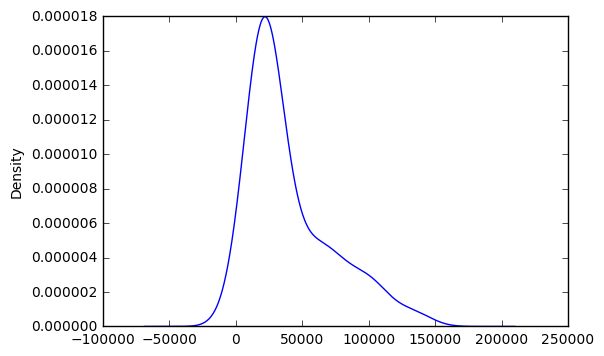

In [22]:
block_counts = input_file.BLOCK.value_counts()
block_counts.plot(kind='kde')
plt.show()

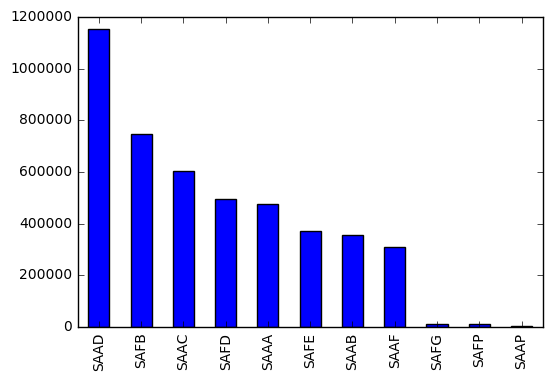

In [23]:
zone_counts = input_file.ZONE.value_counts()
zone_counts.plot(kind='bar')
plt.show()

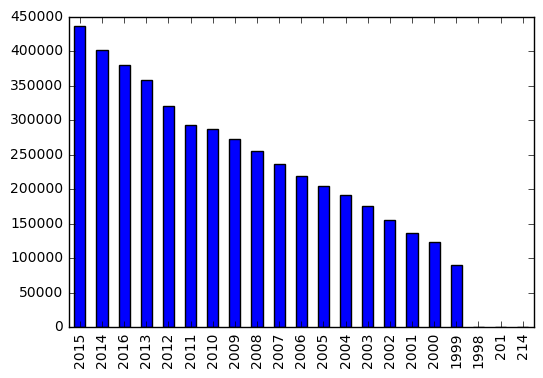

In [24]:
year_counts = input_file.YEAR.value_counts()
year_counts.plot(kind='bar')
plt.show()

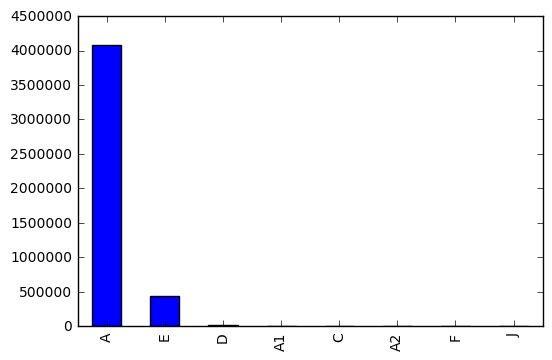

In [25]:
tarif_count = input_file.TARIFF.value_counts()
tarif_count.plot(kind='bar')
plt.show()

In [31]:
input_file.head()

,SL,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,5702.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,6,2001,176.0
1,5871.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,9,2001,200.0
2,5904.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,10,2001,220.0
3,5916.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,8,2001,214.0
4,6041.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,12,2001,149.0


In [51]:
cleaned_input_file = pd.read_csv('../ShahAli_cleaned_without_nan_values.csv')
cleaned_input_file.head()

,SL,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,5702.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,6,2001,176.0
1,5871.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,9,2001,200.0
2,5904.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,10,2001,220.0
3,5916.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,8,2001,214.0
4,6041.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,Child,12,2001,149.0


In [54]:
cleaned_input_file['METER_STATUS']= cleaned_input_file['METER_STATUS'].apply(lambda x: x.upper())
cleaned_input_file.head()

,SL,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,5702.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,CHILD,6,2001,176.0
1,5871.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,CHILD,9,2001,200.0
2,5904.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,CHILD,10,2001,220.0
3,5916.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,CHILD,8,2001,214.0
4,6041.0,PAIKPARA GOVT STAFF QTR,29000041,1068554,"BLD-129/10 MIRPUR, DHAKA",SAAA,100,10.0,2,A,CHILD,12,2001,149.0


In [55]:
cleaned_input_file.METER_STATUS.value_counts()

CHILD     2234815
SINGLE    2101916
CHECK      200425
Name: METER_STATUS, dtype: int64

In [57]:
cleaned_input_file.to_csv('../ShahAli_cleaned_without_nan_values.csv',index=False)